In [52]:
#Importamos las librerias que ocuparemos
#Importamos las librerias que ocuparemos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [53]:
#Cargamos el dataset
dataset = pd.read_csv(r'C:\Users\Elias\Documents\Segundo Proyecto Individual\Datasets\homicidios.xlsx - VICTIMAS.csv')

#Hacemos una copia del dataset
dataset_copia = dataset.copy()

#convertimos a dataframe el dataset
clean_victimas = pd.DataFrame(dataset_copia)


Vizualizamos el dataframe


In [54]:
#Mostramos el dataset
clean_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,1/3/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016
3,2016-0004,1/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016


Observamos como esta distribuido y estructurado el dataframe , que es lo que contiene.


Descripcion del dataframe

In [55]:
#iteramos el dataset para describir como esta compuesto
for column in clean_victimas.columns:
    print(f'Columna: {column}')
    print(f'Tipo: {clean_victimas[column].dtype}')
    print(f'Descripción: {clean_victimas[column].describe()}')

Columna: ID_hecho
Tipo: object
Descripción: count           717
unique          696
top       2017-0035
freq              3
Name: ID_hecho, dtype: object
Columna: FECHA
Tipo: object
Descripción: count           717
unique          598
top       12/5/2020
freq              3
Name: FECHA, dtype: object
Columna: AAAA
Tipo: int64
Descripción: count     717.000000
mean     2018.174338
std         1.672655
min      2016.000000
25%      2017.000000
50%      2018.000000
75%      2019.000000
max      2021.000000
Name: AAAA, dtype: float64
Columna: MM
Tipo: int64
Descripción: count    717.000000
mean       6.688982
std        3.575140
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: MM, dtype: float64
Columna: DD
Tipo: int64
Descripción: count    717.000000
mean      15.960948
std        8.683358
min        1.000000
25%        9.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: DD, dtype: float64
Columna: ROL
Tipo: o

La información que nos arroja, nos sirve para tener una idea general del dataframe, cuantas valores nulos tiene cada columna, que tipo de datos contiene y de que tipo son, sus minimos y sus maximos. 
 

Nulos del dataframe

In [56]:
#Buscamos los valores nulos del dataframe
clean_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

Observamos que el dataframe no contiene valores nulos


Evaluación de las columnas del dataframe

In [57]:
clean_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,1/3/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016
3,2016-0004,1/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,12/12/2021,2021,12,12,PEATON,PEATON,FEMENINO,50,12/12/2021
713,2021-0093,12/13/2021,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,12/18/2021
714,2021-0094,12/20/2021,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,12/20/2021
715,2021-0095,12/30/2021,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,1/2/2022


Escogeremos las columnas con las que vamos a trabajar y hacerle un analísis profundo, eliminaremos aquellas columnas que son redundantes

Eliminación de  columnas del dataframe

In [58]:
#Creamos una lista con las columnas a eliminar
columnas_a_eliminar = ["FECHA",'FECHA_FALLECIMIENTO']

#Eliminamos las columnas seleccionadas del dataframe
clean_victimas =clean_victimas.drop(columnas_a_eliminar, axis=1)

Al tener la columna principal ["FECHA"], nos damos cuenta que las 3 columnas que le prosiguen son columnas con información dividida de la columna
["FECHA"], entendiendo esto podemos precindir de esta columna. La columna ["FECHA_FALLECIMIENTO"] precindire dado que veo inecesario y con poco valor la columna.

Visualización del dataframe actualizado

In [59]:
#Mostramos el dataframe actualizado
clean_victimas.head()

,ID_hecho,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
0,2016-0001,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29


LLegando a este punto, el dataframe esta preparado para su analísis profundo

In [60]:
#Creamos un archivo parquet con el dataset limpio 

clean_victimas.to_parquet(r'C:\Users\Elias\Documents\Segundo Proyecto Individual\Datasets limpios\Eda_victimas.parquet')

Evolución de accidentes por año

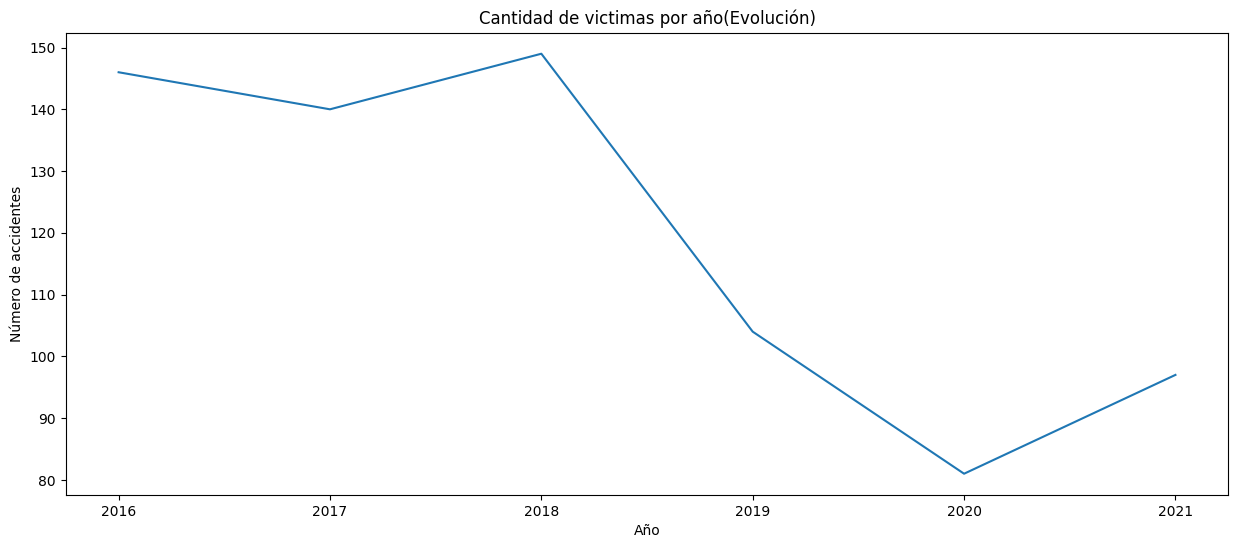

In [61]:
# Agrupamos la columna ["AAAA"] 
años_Agrupados = clean_victimas.groupby("AAAA")["AAAA"].count()

# Mostrar la distribución de accidentes por año

años_Agrupados.plot(kind='line', figsize=(15, 6), title='Cantidad de victimas por año(Evolución)')
plt.xlabel("Año")
plt.ylabel("Número de accidentes")
plt.show()


En esta grafíca podemos observar la tendencia a traves de los años de las victimas, podemos afirmar que de los años 2016 a los años 2018 hubo bastantes victimas de siniestros, pasando el año 2018 podemos observar que la tendecia empieza a disminuir llegando a si a su punto mas bajo que es el año 2020, para si reanudar a la alza el numero de victimas por siniestros. Observamos que en el año 2020 llega a su punto mas bajo de victimas a causa de la baja circulación de vehiculos dio paso a que los siniestros viales fueran menos y eso da como resultado a menos victimas.
Puedo decir que pasando el año  2020, vemos como la tendencia a haber mas victimas va de subida, ya que, la pandemia se acercaba a su final, haciendo que la gente saliera de su confinamiento.

Cantidad de victimas por mes

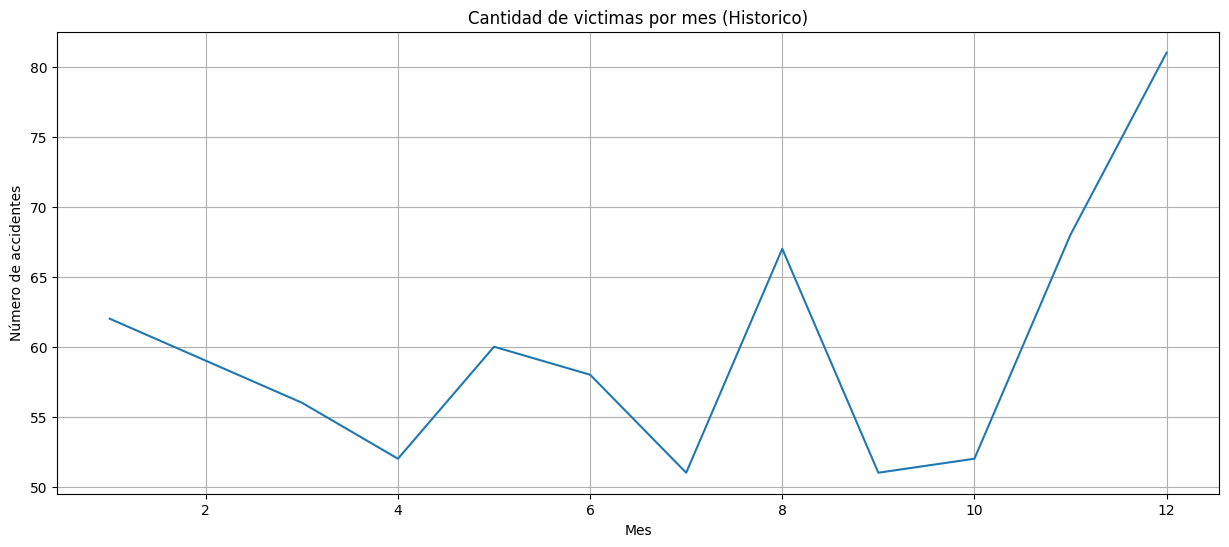

In [62]:
#agrupamos y  contamos los datos de la columna ["MM"]
frecuencia_en_meses = clean_victimas.groupby("MM")["MM"].count()

# Mostrar la distribución de accidentes por mes
frecuencia_en_meses.plot(kind='line', figsize=(15, 6), title='Cantidad de victimas por mes (Historico)')
plt.grid()
plt.xlabel("Mes")
plt.ylabel("Número de accidentes")
plt.show()

Esta grafíca nos muestra como evolucionan la cantidad de victimas a travez del año, como es la tendecia que sigue. Al mirar la grafíca vemos que el inicio del año empieza a descender, siendo el punto mas bajo el mes 4 (abril), luego la tendencia vuelve a subir siendo el pico mas alto el mes 5(junio) para asi descender hasta llegar al punto mas bajo que es el mes 7(julio). A continuación podemos observar una anomalia o suceso claramente visible, observamos que desde mediados de julio la tendencia a la alza es muy pronunciada, llegando hasta agosto y baja de la misma manera en la que subio. Otra gran observación, se puede observar en el mes nueve, donde increiblemente se mantiene estable la tendencia de victimas. 
Para el ultimo trimestre del año, observamos una alarmante tendencia a la alza de una manera muy pronunciante, siendo el mes de diciembre el mes con mas victimas registradas.

Acciones a tomar: sugiero una investigación mas exahusta sobre el rango de tiempo, entre julio - septiembre, para que, con los nuevos datos, pdoamos darle respuesta a esa anomalia o alteración, que es lo que lo produce o si es consecuencia de algo.


Promedio de accidentes por dia

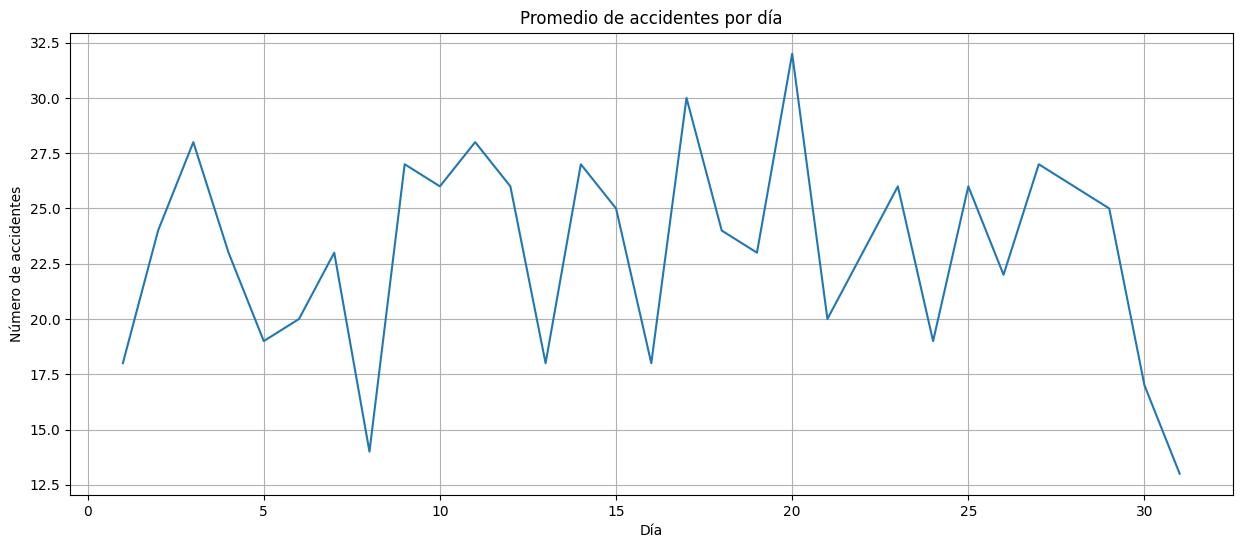

In [63]:
#Agrupamos y contamos la columna ["DD"]
cantidad_de_dias = clean_victimas.groupby("DD")["DD"].count()
# Mostrar la distribución de accidentes por día
cantidad_de_dias.plot(kind='line', figsize=(15, 6), title='Promedio de accidentes por día')
plt.grid()
plt.xlabel("Día")
plt.ylabel("Número de accidentes")
plt.show()

En esta grafica observamos que el inicio del mes los accidentes incrementan hasta el dia 2 y bajan hasta lo mas minimo que es el dia 7, subiendo nuevamente a la alza y baja las semanas posteriores, siendo el dia 20 el maximo dia con accidentes en todo el mes, a partir de ahí la tendencia baja, para asi mantenerse subiendo y bajando, siendo el fin de mes el dia con menos victimas registrados.

La explicación que se le puede otorgar a esta grafica, reside en lo economico, al comenzar el mes la gente recibe su quincena u paga semanal lo que le permite los primeros dias salir de su hogar y hacer compras o pagos de servicios, entretenimiento, etc. A partir de ese momento observamos  que cada semana(7 dias), el comportamiento es repetitivo, cada dia de posterior a la paga la gente sale mas a la calle, haciendo que halla mas circulación vehicular o peatonal. Ya que faltando un dia o el mero dia de paga, permiten darse sus lujos o sus regalos . 

Recomiendo que cada dia de paga sea, semanal o quincenal, se desplieguen operativos o se desplieguen campañas de publicidad con el fin de que esos dias en especificos tengan mayor precaución al estar en vialidades.

Porcentaje de Victimas por Rol

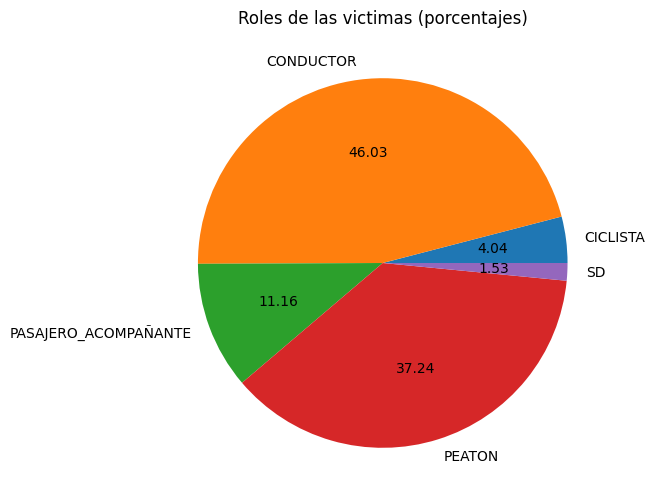

In [64]:
# Agrupar los datos por rol y contar los siniestros
rol_agrupado = clean_victimas.groupby("ROL")["ROL"].count()

# Mostrar la distribución de accidentes por rol en un gráfico de pie
rol_agrupado.plot(kind='pie', figsize=(15, 6), title='Roles de las victimas (porcentajes)', autopct='%.2f')
plt.ylabel('')  # Para eliminar la etiqueta innecesaria en el eje Y
plt.show()


En esta grafica de pastel, podemos entender como esta distribuido los roles de las victimas, que es lo que estaban desenpeñando en ese momento. Observamos que los conductores son la mayoria de victimas en los siniestros viales, seguido por los peatones, y observando, os damos cuenta que los pasajeros que van en el carro, tienen un notable porcentaje de victimas, siendo los ciclistas el grupo minoritario, y un pequeñisimo porcentaje representa los datos no registrados.

La explicación que puede tener esta grafica, es que, los conductores siendo victimas tambien pueden ser los mismos causantes de siniestros, a parte los peatones suelen ser victimas de los siniestros viales dado que en muchas ocasiones estan en la trayectoria de los causantes.
Los pasajeros o acompañantes de los vehiculos en muchas ocasiones son victimas de los siniestros viales, dado que, no ocupan u utilizan los cinturones de seguridad o son impactados de alguna manera desfavorable.
Los ciclistas al igual que los peatones, ahi una alta posibilidad de que este en la trayectoria de los causantes (Acusados) siendo estos victimas de los siniestros.


Las recomendaciones y acciones que puede dar, son:
Hacer campañanas de vialidad con el fin de buscar o asegurar que las personas esten usando el cinturon de seguridad.
Otra recomendación es, hacer un llamado a la sociedad por medio de redes sociales o publicidad, con la finalidad de que sean precavidos al cruzar las calles, o no estar con el telefono. A si el peaton esta al pendiente de su entorno, reduciendo la probabilidad de que sea victima de un siniestro.

En que medio estaba la victima


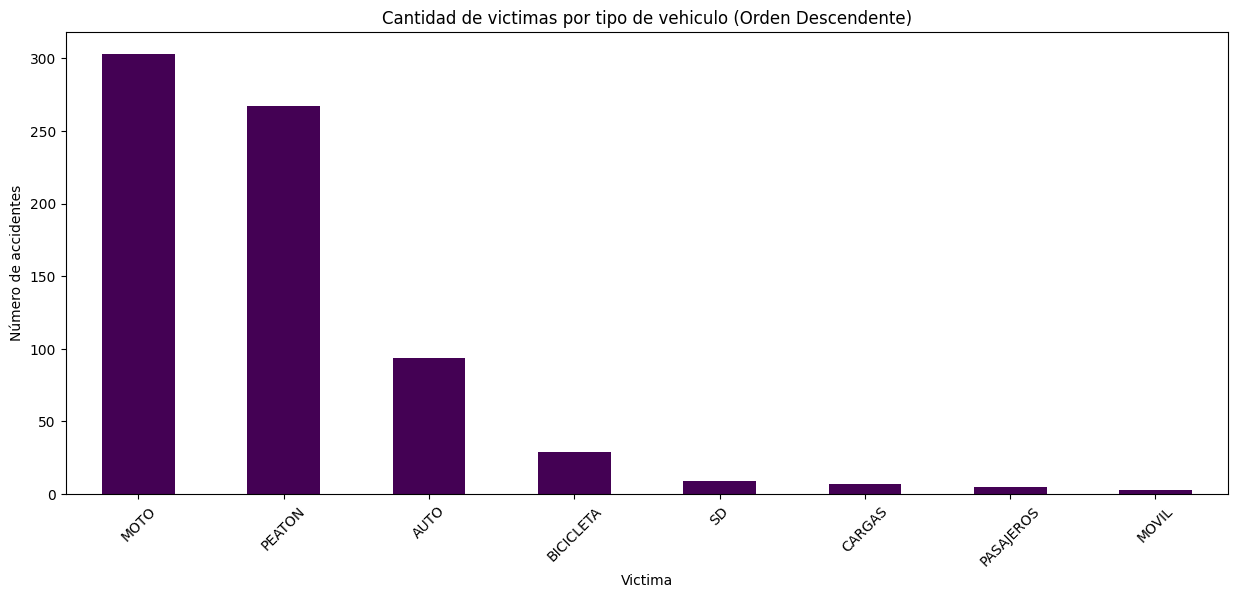

In [65]:
# Agrupar la columna victima y ordenar en forma descendente
victimas_agrupadas = clean_victimas.groupby("VICTIMA")["VICTIMA"].count().sort_values(ascending=False)

# Mostrar la distribución de victimas
victimas_agrupadas.plot(kind='bar', figsize=(15, 6), title='Cantidad de victimas por tipo de vehiculo (Orden Descendente)', colormap= "viridis")
plt.xticks(rotation=45)
plt.xlabel('Victima')
plt.ylabel('Número de accidentes')
plt.show()


Esta grafíca, puede parecer un poco confusa a la hora de visualizarla, pero para nada lo es. Esta grafica nos da información sobre cual es el medio en el cual sufrieron las consecuencias del siniesto, ayundadonos de la grafica anterior puedo decir, que la mayoria de las victimas en el suceso del siniestro, estaban conduciendo motocicletas , seguida de las victimas peatonales y seguida de los conductores de autos.

Esta explicación, es un poco similar a la de arriba , siendo la moto un medio con baja protección, hace posible que aunque el accidente no sea tan grave, las consecuencias se le transmita al cuerpo humano con la intensidad intacta, no al contrio que de los autos, que el chasis absorbe gran parte del inpacto del siniestro vial.
En lo peatonal las victimas en la mayoria de los casos son personas que pudiendo poner mas atención a la calle , no lo hicieron, dado que andaban despistados o distraidos con  el celular u otros factores.

La recomendación que puedo dar a los conductores de motos, es que siempre esten atento a los retrovisores y que siempre den espacio suficiente para maniobrar, a su vez, eviten meterse entre los carros si no es necesario o ponerse en lugares muy cerrados de dificil maniobra.

Victimas por Genéro

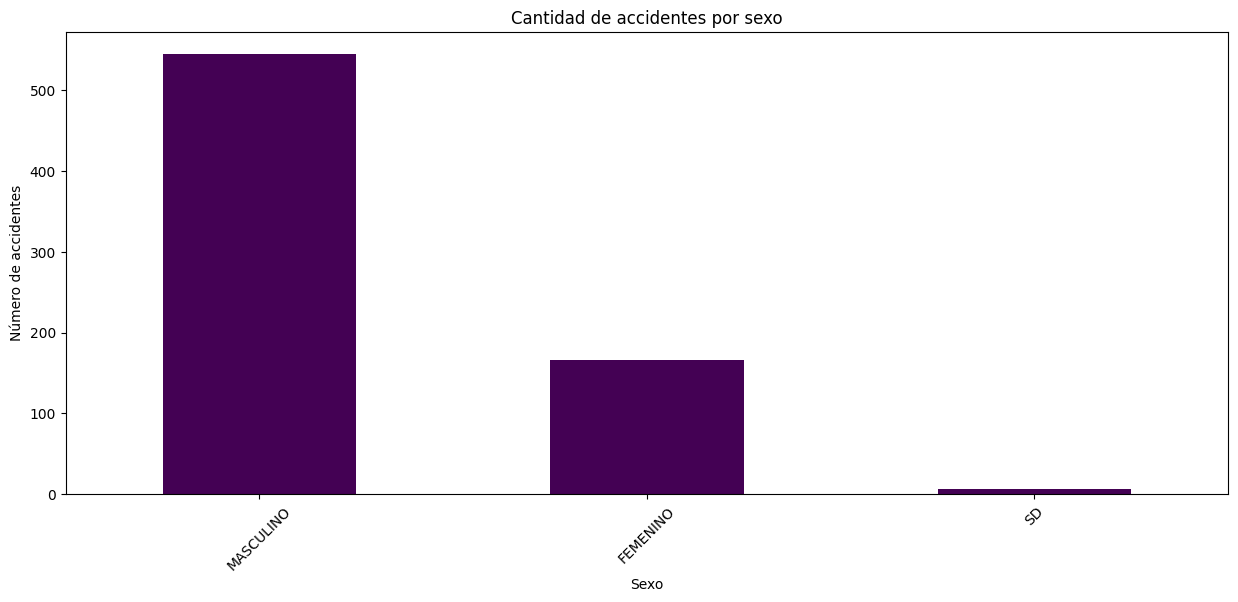

In [66]:
# Agrupar la columna ["SEXO"] y ordenar en forma descendente
sexo_agrupado = clean_victimas.groupby("SEXO")["SEXO"].count().sort_values(ascending=False)

# Mostrar la distribución de accidentes por sexo
sexo_agrupado.plot(kind='bar', figsize=(15, 6), title='Cantidad de accidentes por sexo', colormap= "viridis")
plt.xticks(rotation=45)
plt.xlabel('Sexo')
plt.ylabel('Número de accidentes')
plt.show()

El genéro masculino tiene un rol en la sociedad como aquel que se encarga de transportar o de trabajar a gente, mercancia o asi mismo a diferentes lugares y al estar mas presente en las calles o vialidad , es logico que se registre mas victimas por siniestros, ya que, en muchas ocasiones , es este el genero que mas esta detras de un volante. En comparación del genero femenino que su precencia como conductora es menor, siendo mas esta pasajera o con el rol de peatonal las que son victimas de los siniestros viales.

Edades con mas victimas de siniestros viales


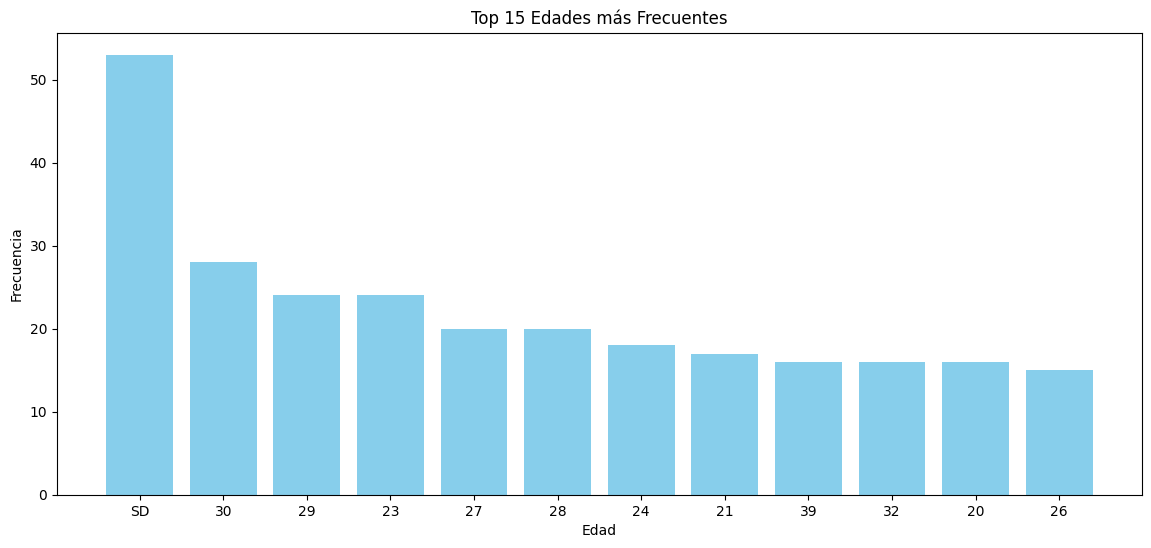

In [67]:
# Obtener las 10 edades más frecuentes
top_10_edades = clean_victimas['EDAD'].value_counts().nlargest(12)

# Crear el histograma
plt.figure(figsize=(14, 6))
plt.bar(top_10_edades.index, top_10_edades.values, color='skyblue')

# Agregar título y etiquetas
plt.title('Top 15 Edades más Frecuentes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.xticks(top_10_edades.index)  # Asegúrate de que los ticks en el eje x correspondan a las edades
plt.show()


Podemos observar en esta grafica, que hay un alto volumen de registros vacios en la cuestion de edad, observamos tambien que las edades con mas victimas siniestras abarcan el rango desde los 21 años hasta los 30 años.

Concluyo que las victimas que no tienenalgun tipo de registro, radica en que, tras el accidente las victimas fueron irreconocibles o no traian algun tipo de identificación, en los años de 21 al 30 la inprudencia, el exceso de velocidad o tambien, como bien vimos en la grafica anterior es posible que los conductores de las motos sean gente que oscile entre este rango de edades, puede ser una de las causas por la cual sufren las consecuencias de los siniestros viales.

Acción a recomendar, hacer concientización por medio de campañas o publicidad dirigida a esa edades, para ser precavios, a la hora de transitar por esas vialidades.

Media de edad por Genero(Sexo)

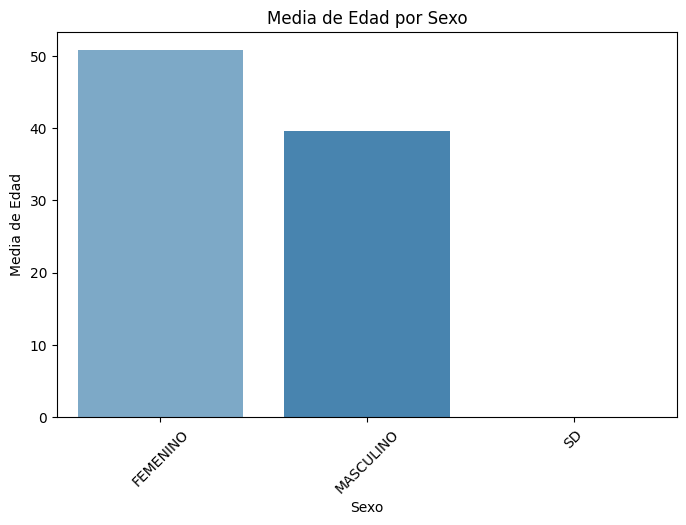

In [68]:
# Convertir la columna 'EDAD' a tipo numérico
clean_victimas['EDAD'] = pd.to_numeric(clean_victimas['EDAD'], errors='coerce')

# Calcular la media de edad por sexo
media_edad_sexo = clean_victimas.groupby('SEXO')['EDAD'].mean()

# Graficar la media
plt.figure(figsize=(8, 5))
sns.barplot(x=media_edad_sexo.index, y=media_edad_sexo.values, palette='Blues_d')
plt.title('Media de Edad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Media de Edad')
plt.xticks(rotation=45)
plt.show()


Esta grafica , en comparación de la anterior podemos decir que la media de edad de las victimas , es de, 50/51 años para el género femenino, mientras que para el género masculino es de 39/40 años.

Victimas por genero a lo largo del tiempo

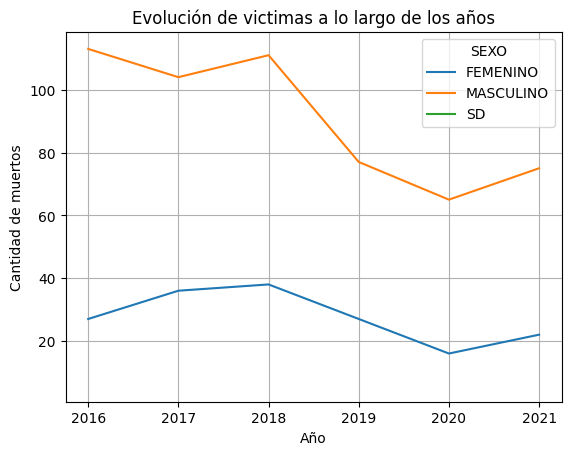

In [69]:
#Que año ha muerto mas hombres y mujeres
muertos_por_sexo = clean_victimas.groupby(['AAAA', 'SEXO']).count().reset_index()
#graficamos el dataframe de cantidad por genero a lo largo d elos años
sns.lineplot(data=muertos_por_sexo, x='AAAA', y='VICTIMA', hue='SEXO')
plt.grid()
plt.title('Evolución de victimas a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Cantidad de muertos')
plt.show()


Podemos observar en esta grafica la tendencia de victimas por genero, vemos como las victimas femeninas tienen una tendecia a la alza del año 2016 al año 2018, su contraparte que las victimas del sexo masculino mantienen un rango en las victimas ocurridas en estos años.
Podemos observar que del año 2018 hasta el año 2020 la tendencia en Femenino fue a la baja de una manera consecutiva, mientras que en los hombres, su tendencia a la baja es mas drastica del 2018 al 2019, del 2019 al 2020 la tendencia es menos pronunciada. El año 2020 , al ser un año pandemico, registra baja cantidad de victimas dado que el confinamiento evitada que la gente saliera a las vialidades. Por ultimo pero menos importante vemos como pasando el año 2020 la tendencia en victimas de ambos generos es a la alza.

Acción a implentar: Recomiendo una investigación sobre que estrategias u acciones se implementaron en el año 2018 - 2019, que hizo que la tendencia en victimas disminuyera considerablemente. Asi se puede dar una idea de que estrategias o acciones son eficazes para la disminucion de accidentes.

Victimas por rol y sexo

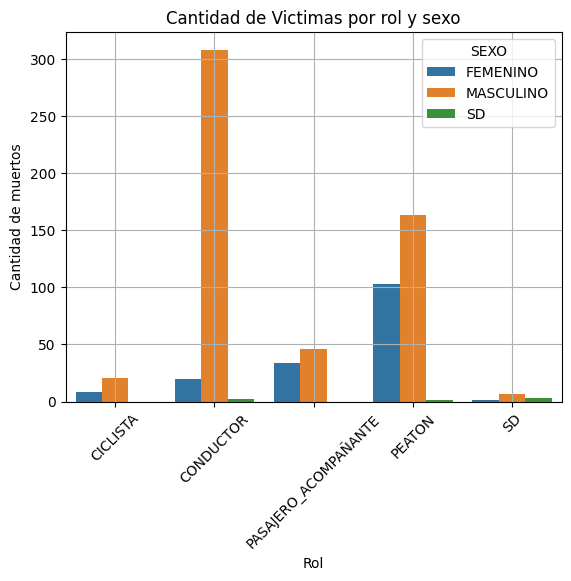

In [70]:
#Agrupamos la columna rol y conductor para graficar despues
rol_por_sexo = clean_victimas.groupby(['ROL', 'SEXO']).count().reset_index()

#Graficamos el dataframe de rol_por_sexo
sns.barplot(data=rol_por_sexo, x='ROL', y='VICTIMA', hue='SEXO')
plt.grid()
plt.xticks(rotation=45)
plt.title('Cantidad de Victimas por rol y sexo')
plt.xlabel('Rol')
plt.ylabel('Cantidad de muertos')
plt.show()

Esta grafica nos da información mas precisa, sobre que papel estaba desarrollando la victima y de que sexo(genero) era. Observamos en general que las victimas son bastante mas masculinos que femeninos, siendo el genero masculino los que estan detras de un volante que sufren las consecuencias de los siniestros, al igual que en rol de peaton el género masculino es mas quien tiene victimas, aparte en esta misma sección, observamos que la mayor cantidad de victimas del género femenino son desempeñadas por el rol de peatón.

Victimas por papel y edad 

Text(0, 0.5, 'Cantidad de accidentes')

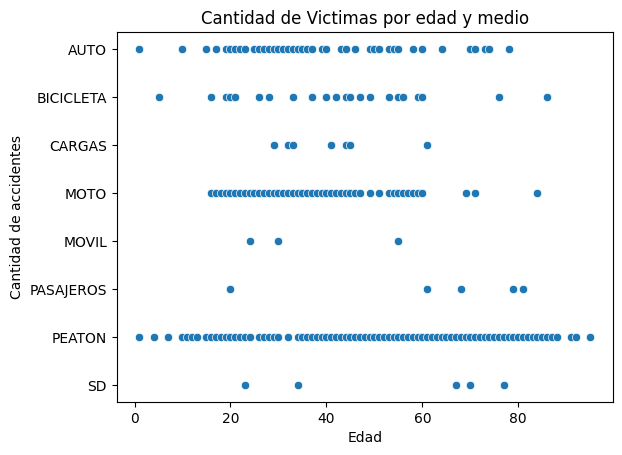

In [71]:
#Agrupamos ["victima"] y ["eddad"]
victima_edad_agrupada = clean_victimas.groupby(['VICTIMA', 'EDAD']).count().reset_index()

#Mostrar la distribución de accidentes por edad y victima
sns.scatterplot(data=victima_edad_agrupada, x='EDAD', y='VICTIMA')

plt.title('Cantidad de Victimas por edad y medio')
plt.xlabel('Edad')
plt.ylabel('Cantidad de accidentes')

Esta grafica nos muestra como esta la distribución de la edad por el medio en el que se encontraba la victima, es decir si la victima era una persona de 40 años que estaba dentro de un auto. Observmaos de vista general que la mayoria de victimas tienen una edad de 20 años a 60 años, siendo los peatones el medio con mas amplitud de edades al igual que las motos.
Tambien se observo, valores sorprendentes en las edades, viendo como hay gente menor de edad que son victimas a una edad muy temprana como de 10 años para abajo o en su contra parte gente de edad avanzada de 60 años en adelante, siendo mas victimas de estas edades los que van en automovil y siendo peatones.